In [27]:
import pandas as pd

df = pd.read_csv('1.9.3_dataset.csv')


In [28]:
from tqdm import tqdm
import numpy as np
import re

def process_data(df):
    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        # Extracting lower and upper bounds of the salary range
        lower_bound = np.nan
        upper_bound = np.nan
        
        if "-" in row['salary']:
            values = row['salary'].split('-')
            lower_bound = float(re.sub("[^0-9]", "", values[0]))  # keep only numeric characters
            upper_bound = float(re.sub("[^0-9]", "", values[1]))
        
        df.at[i, 'lower_bound'] = lower_bound
        df.at[i, 'upper_bound'] = upper_bound

    # Compute average salary
    df['avg_salary'] = df[['lower_bound', 'upper_bound']].mean(axis=1)
    return df

# Filter out "Not specified" entries
filtered_df = df[df['salary'] != 'Not specified']
df_processed = process_data(filtered_df.copy())


100%|████████████████████████████████████████████████████████████████████████████| 3564/3564 [00:00<00:00, 9390.30it/s]


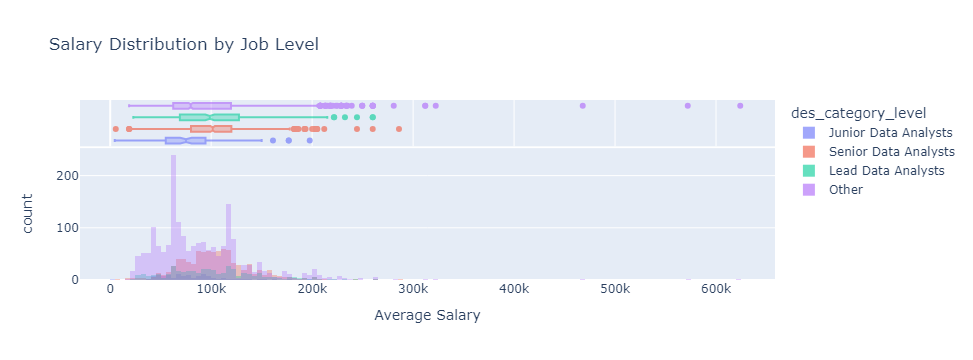

In [29]:
# Visualization
import plotly.express as px

fig = px.histogram(df_processed, x="avg_salary", color="des_category_level", marginal="box", 
                   title="Salary Distribution by Job Level",
                   labels={"avg_salary": "Average Salary"},
                   category_orders={"des_category_level": ["Junior Data Analysts", "Senior Data Analysts", "Lead Data Analysts"]},
                   barmode="overlay")
fig.update_traces(opacity=0.6)
fig.show()

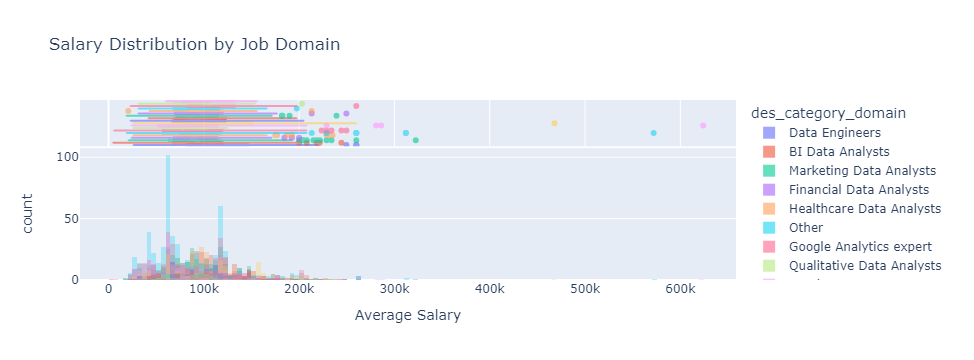

In [36]:
# Visualization by Domain
fig_domain = px.histogram(df_processed, x="avg_salary", color="des_category_domain", marginal="box", 
                          title="Salary Distribution by Job Domain",
                          labels={"avg_salary": "Average Salary"},
                          barmode="overlay")
fig_domain.update_traces(opacity=0.6)
fig_domain.show()


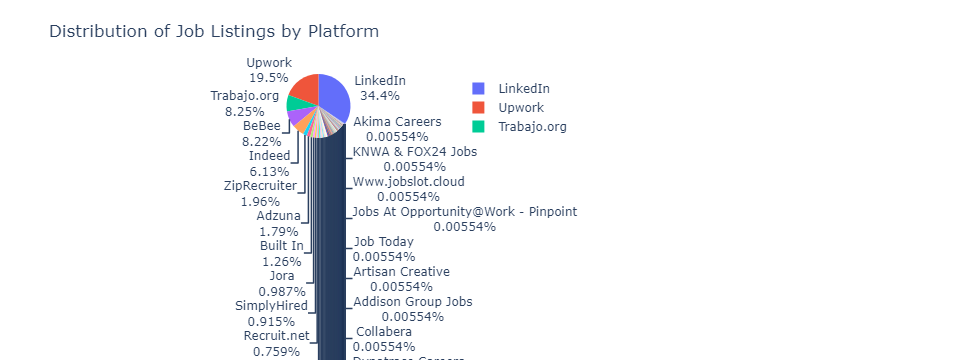

In [30]:
# Grouping data by platform and counting job listings
platform_counts = df['platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']

# Creating the pie chart
fig = px.pie(platform_counts, values='Count', names='Platform', title='Distribution of Job Listings by Platform')
fig.update_traces(textinfo='percent+label')
fig.show()



In [34]:
import pandas as pd

data = pd.read_csv('1.9.3_dataset.csv')
df = pd.DataFrame(data)



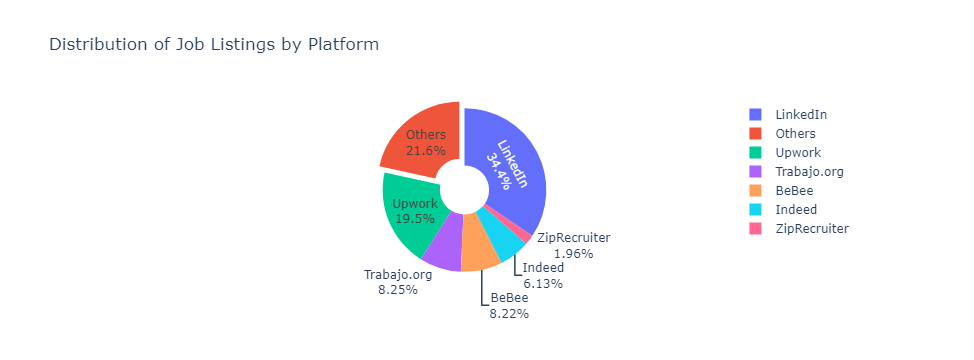

In [35]:
# Display top 8 platforms individually and group the rest into "Others"
top_N = 6
top_platforms = df['platform'].value_counts().index[:top_N]

df['grouped_platform'] = df['platform'].apply(lambda x: x if x in top_platforms else 'Others')

grouped_platform_counts = df['grouped_platform'].value_counts().reset_index()
grouped_platform_counts.columns = ['Platform', 'Count']

# Creating the donut chart
fig = px.pie(grouped_platform_counts, values='Count', names='Platform', title='Distribution of Job Listings by Platform', hole=0.3)
fig.update_traces(textinfo='percent+label', pull=[0.1 if platform == 'Others' else 0 for platform in grouped_platform_counts['Platform']])
fig.show()
